**Scenario**</b>

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv("Data/DATA_Customer-Churn.csv")

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):



**Round 1**
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. - - Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:<br>
 a.Scale the features either by using normalizer or a standard scaler. <br>
 b.Split the data into a training set and a test set. <br>
 c.(optional)Fit a logistic Regression model on the training data. <br>
 d.Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data. <br>

**Read that data into Python and call the dataframe churnData.**

In [4]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

In [5]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


**Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type.**<br>
**Convert this column into numeric type using pd.to_numeric function.**

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [7]:
#we need to make it float instead of objet. Astype doesn't woork because we have some erros.
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [8]:
#we need to check the number of nan in the numeric clolumns (float)
churnData['TotalCharges'].isnull().sum()
#we have nan values in 'Total charges' and we don't have them in -

11

**Check for null values in the dataframe. Replace the null values.**

In [9]:
#ideally, we would replace the nan values by the number of Monthlycharger*Tenure, but I don't know how to do it.
#I'll replace the nan values by the mean. 
churnData['TotalCharges'] = churnData[['TotalCharges']].fillna(value=churnData.TotalCharges.mean())

**Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:**

In [10]:
churnData.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# X : drop all the columns except 'tenure, SeniorCitizen, MonthlyCharges and TotalCharges'
X = churnData.drop(columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'Churn'], axis=1)
#y : churn 
y = churnData['Churn']
#convert y to dummy(binary) data
y = pd.Series(np.where(y.values == 'Yes', 1, 0),y.index)


In [12]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [13]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2142,0,21,64.85,1336.800000
1623,0,54,97.20,5129.450000
6074,0,1,23.45,23.450000
1362,0,4,70.20,237.950000
6754,0,0,61.90,2283.300441


,Error_metric,Train,Test
0,Accuracy,0.787362,0.797729
1,Precision,0.650810,0.678862
2,Recall,0.429813,0.447721


Confusion matrix for the train set
[[3793  345]
 [ 853  643]]


/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


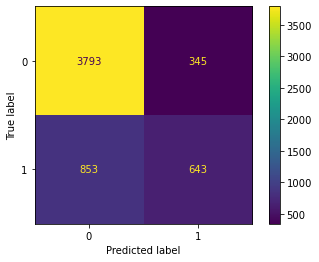



Confusion matrix for the test set
[[957  79]
 [206 167]]


/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


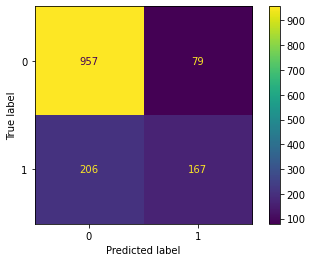

In [14]:
#logistic regression

log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [15]:
#Result for log are not good, probabnly because we only included 4 columns out of 16
#try making it binary

**Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data**

In [16]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

In [17]:
neigh = KNeighborsRegressor(n_neighbors=2) # n_neighbors = K

In [18]:
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [19]:
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

,Error_metric,Train,Test
0,Mean error,0.06,0.06
1,Mean absolute error,0.25,0.45
2,Mean squared error,0.23,0.56
3,Root mean squared error,0.48,0.75
4,Mean absolute percentual error,15.49,28.77
5,R2,0.60,0.02


In [20]:
full = pd.DataFrame()

models = {'k': [] }

for k in range(2,23):

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*6, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Mean error,0.06,0.06
1,2,Mean absolute error,0.25,0.45
2,2,Mean squared error,0.23,0.56
3,2,Root mean squared error,0.48,0.75
4,2,Mean absolute percentual error,15.49,28.77
5,2,R2,0.60,0.02
0,3,Mean error,0.08,0.08
1,3,Mean absolute error,0.33,0.45
2,3,Mean squared error,0.30,0.52
3,3,Root mean squared error,0.55,0.72


In [21]:
full[full['Error_metric'] == 'R2']

,k,Error_metric,Train,Test
5,2,R2,0.60,0.02
5,3,R2,0.48,0.10
5,4,R2,0.41,0.16
5,5,R2,0.37,0.19
5,6,R2,0.34,0.20
5,7,R2,0.32,0.20
5,8,R2,0.31,0.22
5,9,R2,0.30,0.22
5,10,R2,0.30,0.22
5,11,R2,0.29,0.23


**(extra for the future) Continue the exercise adding more variables.**

**Round 2**

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

**Test with previous model** (numerical 4 variables)

In [23]:
X.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50


In [24]:
y.head(2)

0    0
1    0
dtype: int64

In [25]:
print(X.shape)
print(y.shape)

(7043, 4)
(7043,)


In [26]:
X_train.shape

(5634, 4)

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


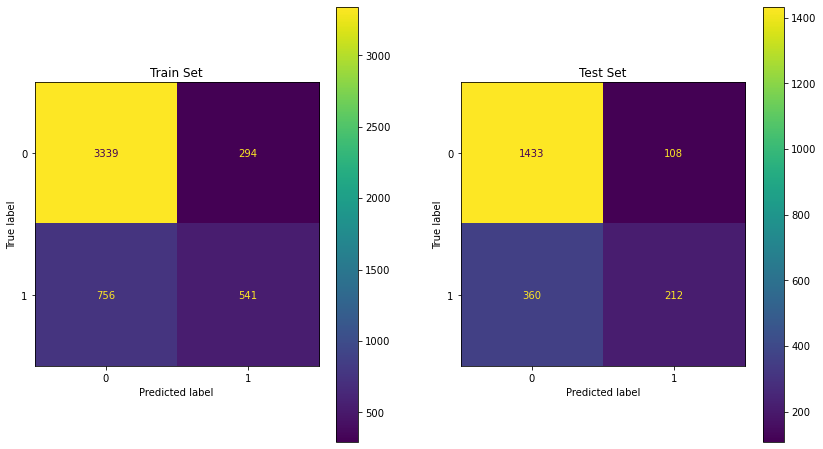

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 4 artists>

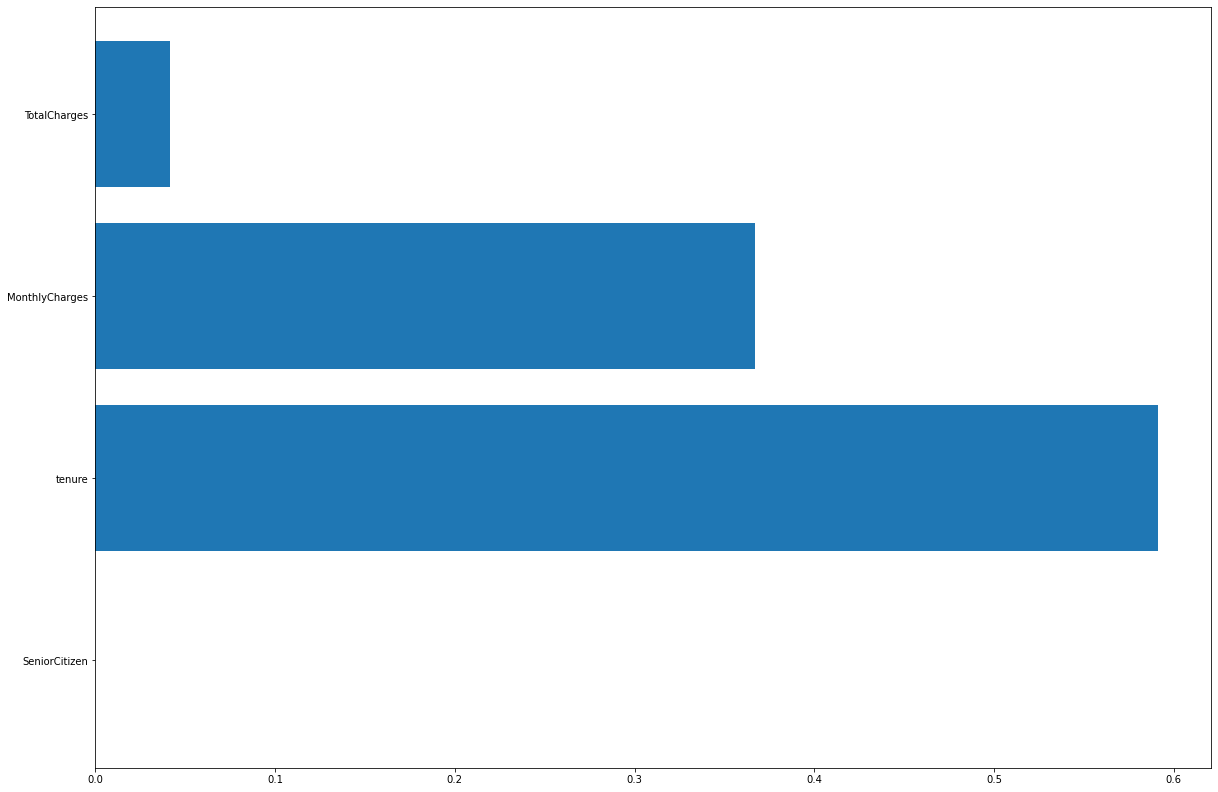

In [28]:
#features importance

plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

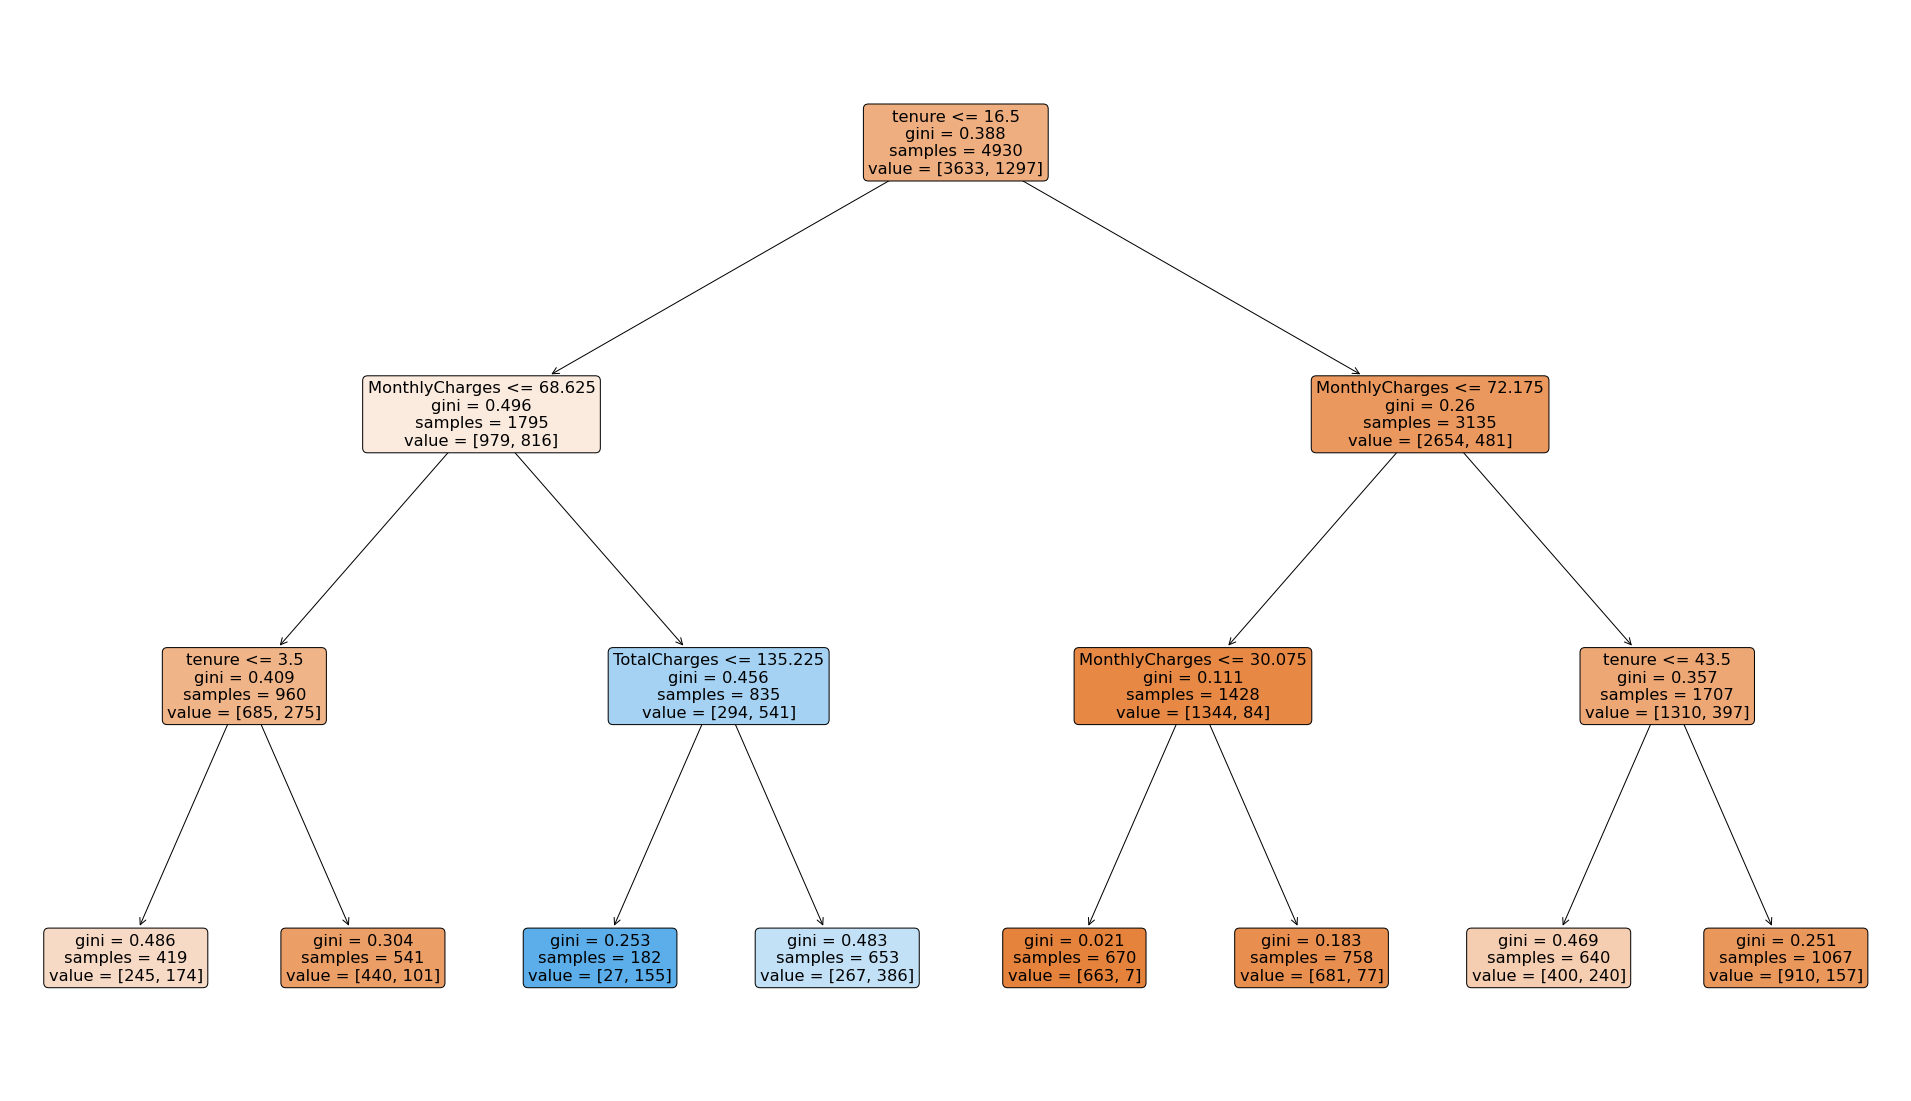

In [29]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

**Test with all the data**    Hi = categorical variables improve our model

In [30]:
churnData_tr = pd.read_csv("Data/DATA_Customer-Churn.csv")

In [31]:
churnData.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
#Defining X, y

X = churnData.drop(columns=["Churn"], axis = 1)
y = churnData["Churn"]
y = pd.Series(np.where(y.values == 'Yes', 1, 0),y.index)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 825.5+ KB


In [34]:
#Since it's not possible to create the decision tree with the categorical values (it would be possibe with a specific library)

categoricals_features= X.select_dtypes("object")
numerical_features = X.select_dtypes(exclude = ['object'])


In [35]:
X = pd.concat([pd.get_dummies(categoricals_features), numerical_features], axis=1)

In [36]:
X.shape

(7043, 33)

In [37]:
y.shape

(7043,)

In [38]:
# Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

,Error_metric,Train,Test
0,Accuracy,0.78,0.78
1,Precision,0.63,0.63
2,Recall,0.43,0.42


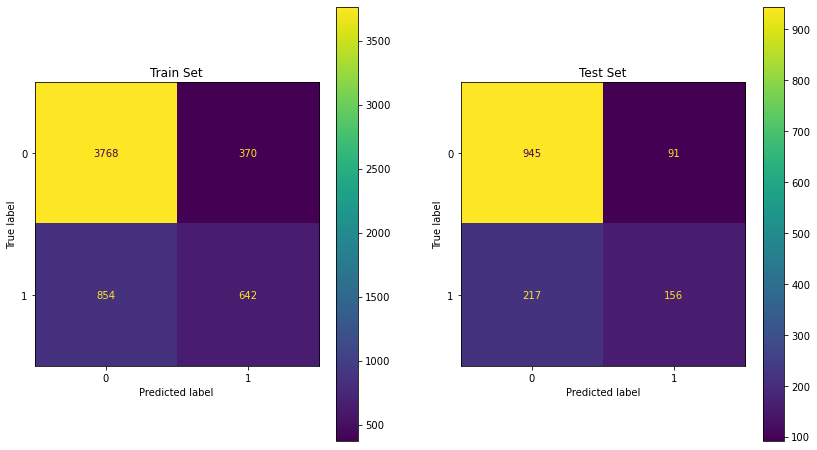

In [39]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 33 artists>

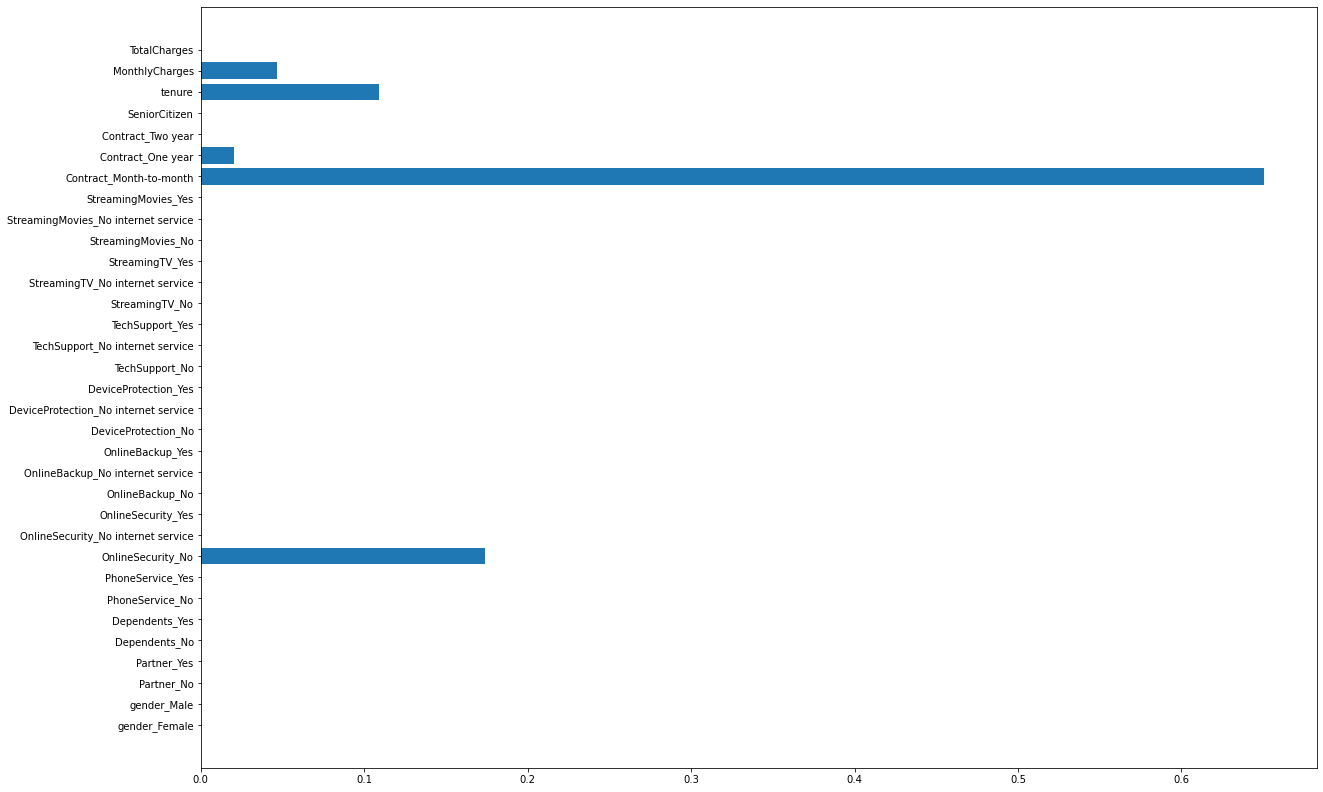

In [40]:
#features importance

plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

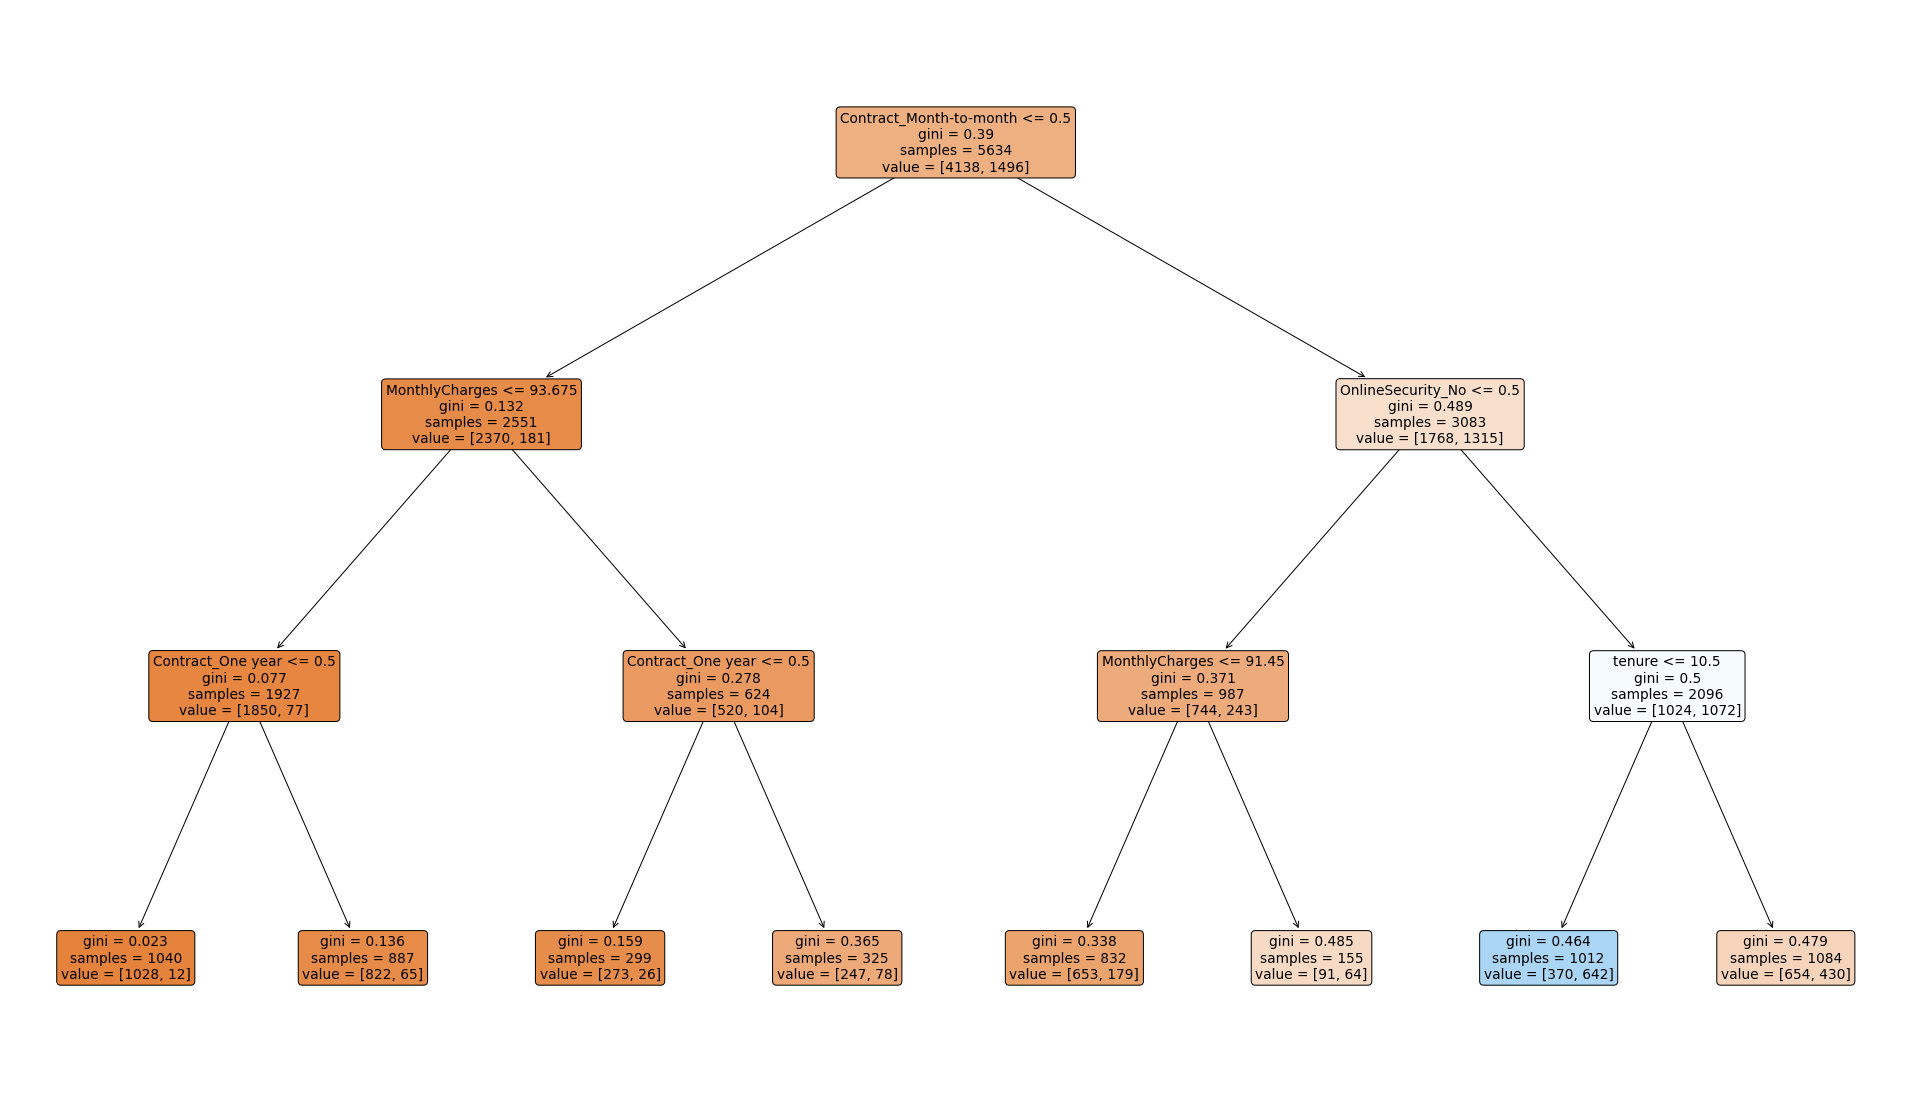

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

**Apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.**

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [43]:
print(X.shape)
print(y.shape)

print(X_train.shape)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train)) #is not supposed to be R2 = 1?

(7043, 33)
(7043,)
(5634, 33)
0.7814052519517388
0.7827476038338658


In [48]:
y_train.value_counts() #we have less data of users not leaving the company 👀
#we've inbalanced data which means that we should do upsampling (or downsampling), we would choose upsampling

0    4138
1    1496
dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

y_train.value_counts()

0    4138
1    4138
dtype: int64

In [55]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.7814052519517388
0.653093281778637


In [63]:
DEPTH=6

model = DecisionTreeClassifier(max_depth=DEPTH)
model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt  = model.predict(X_test)

model_eval(y_train, y_pred_train_dt, y_test, y_pred_test_dt) # get model errors

,Error_metric,Train,Test
0,Accuracy,0.83,0.77
1,Precision,0.81,0.55
2,Recall,0.85,0.71


In [87]:
scores=[cross_val_score(model, X_train, y_train, cv=va).mean() for va in range(2,32)]
#we play around with cross validation 
print(scores)

[0.7999033349444176, 0.8020849514144186, 0.8046157564040599, 0.8011213275537458, 0.8047565623762932, 0.8027018815215391, 0.8035518225735617, 0.8071747541173192, 0.8064485743826998, 0.8065878009560724, 0.8108005020228153, 0.8081419237338789, 0.8070514767849793, 0.8085067115565024, 0.8116640403874447, 0.8099487671966903, 0.8111639986107164, 0.810819083456823, 0.8114041244107566, 0.81115925133788, 0.8098506867307308, 0.8130956225694025, 0.811043702954724, 0.8128413351290358, 0.8129120391644789, 0.8116927150479768, 0.8132611576467509, 0.8112416923669191, 0.8117689942907335, 0.8135661734982619]


In [86]:
print("%0.2f accuracy with a standard deviation of %0.6f" % (np.mean(scores), np.std(scores)))

0.81 accuracy with a standard deviation of 0.003961


In [99]:
s=[cross_val_score(model, X_train, y_train, cv=5)]
print("%0.2f accuracy with a standard deviation of %0.6f" % (np.mean(s), np.std(s)))

0.80 accuracy with a standard deviation of 0.061001


In [101]:
model1 = DecisionTreeRegressor()

model2 = LogisticRegression() 

model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': -0.11399963100439543, 'Logistic Regression': 0.8132081819110585, 'KNN': 0.017046706521420908}
